<a href="https://colab.research.google.com/github/dbrody112/Frequentist-Machine-Learning/blob/main/Dan_Brody_Random_Forest_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Classifier**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart-disease.csv to heart-disease (1).csv


In [ ]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import io

#LOADING DATA

dataset = pd.read_csv(io.BytesIO(uploaded['heart-disease.csv']))
#DATA VISUALIZATION WITH CORRELATION

dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


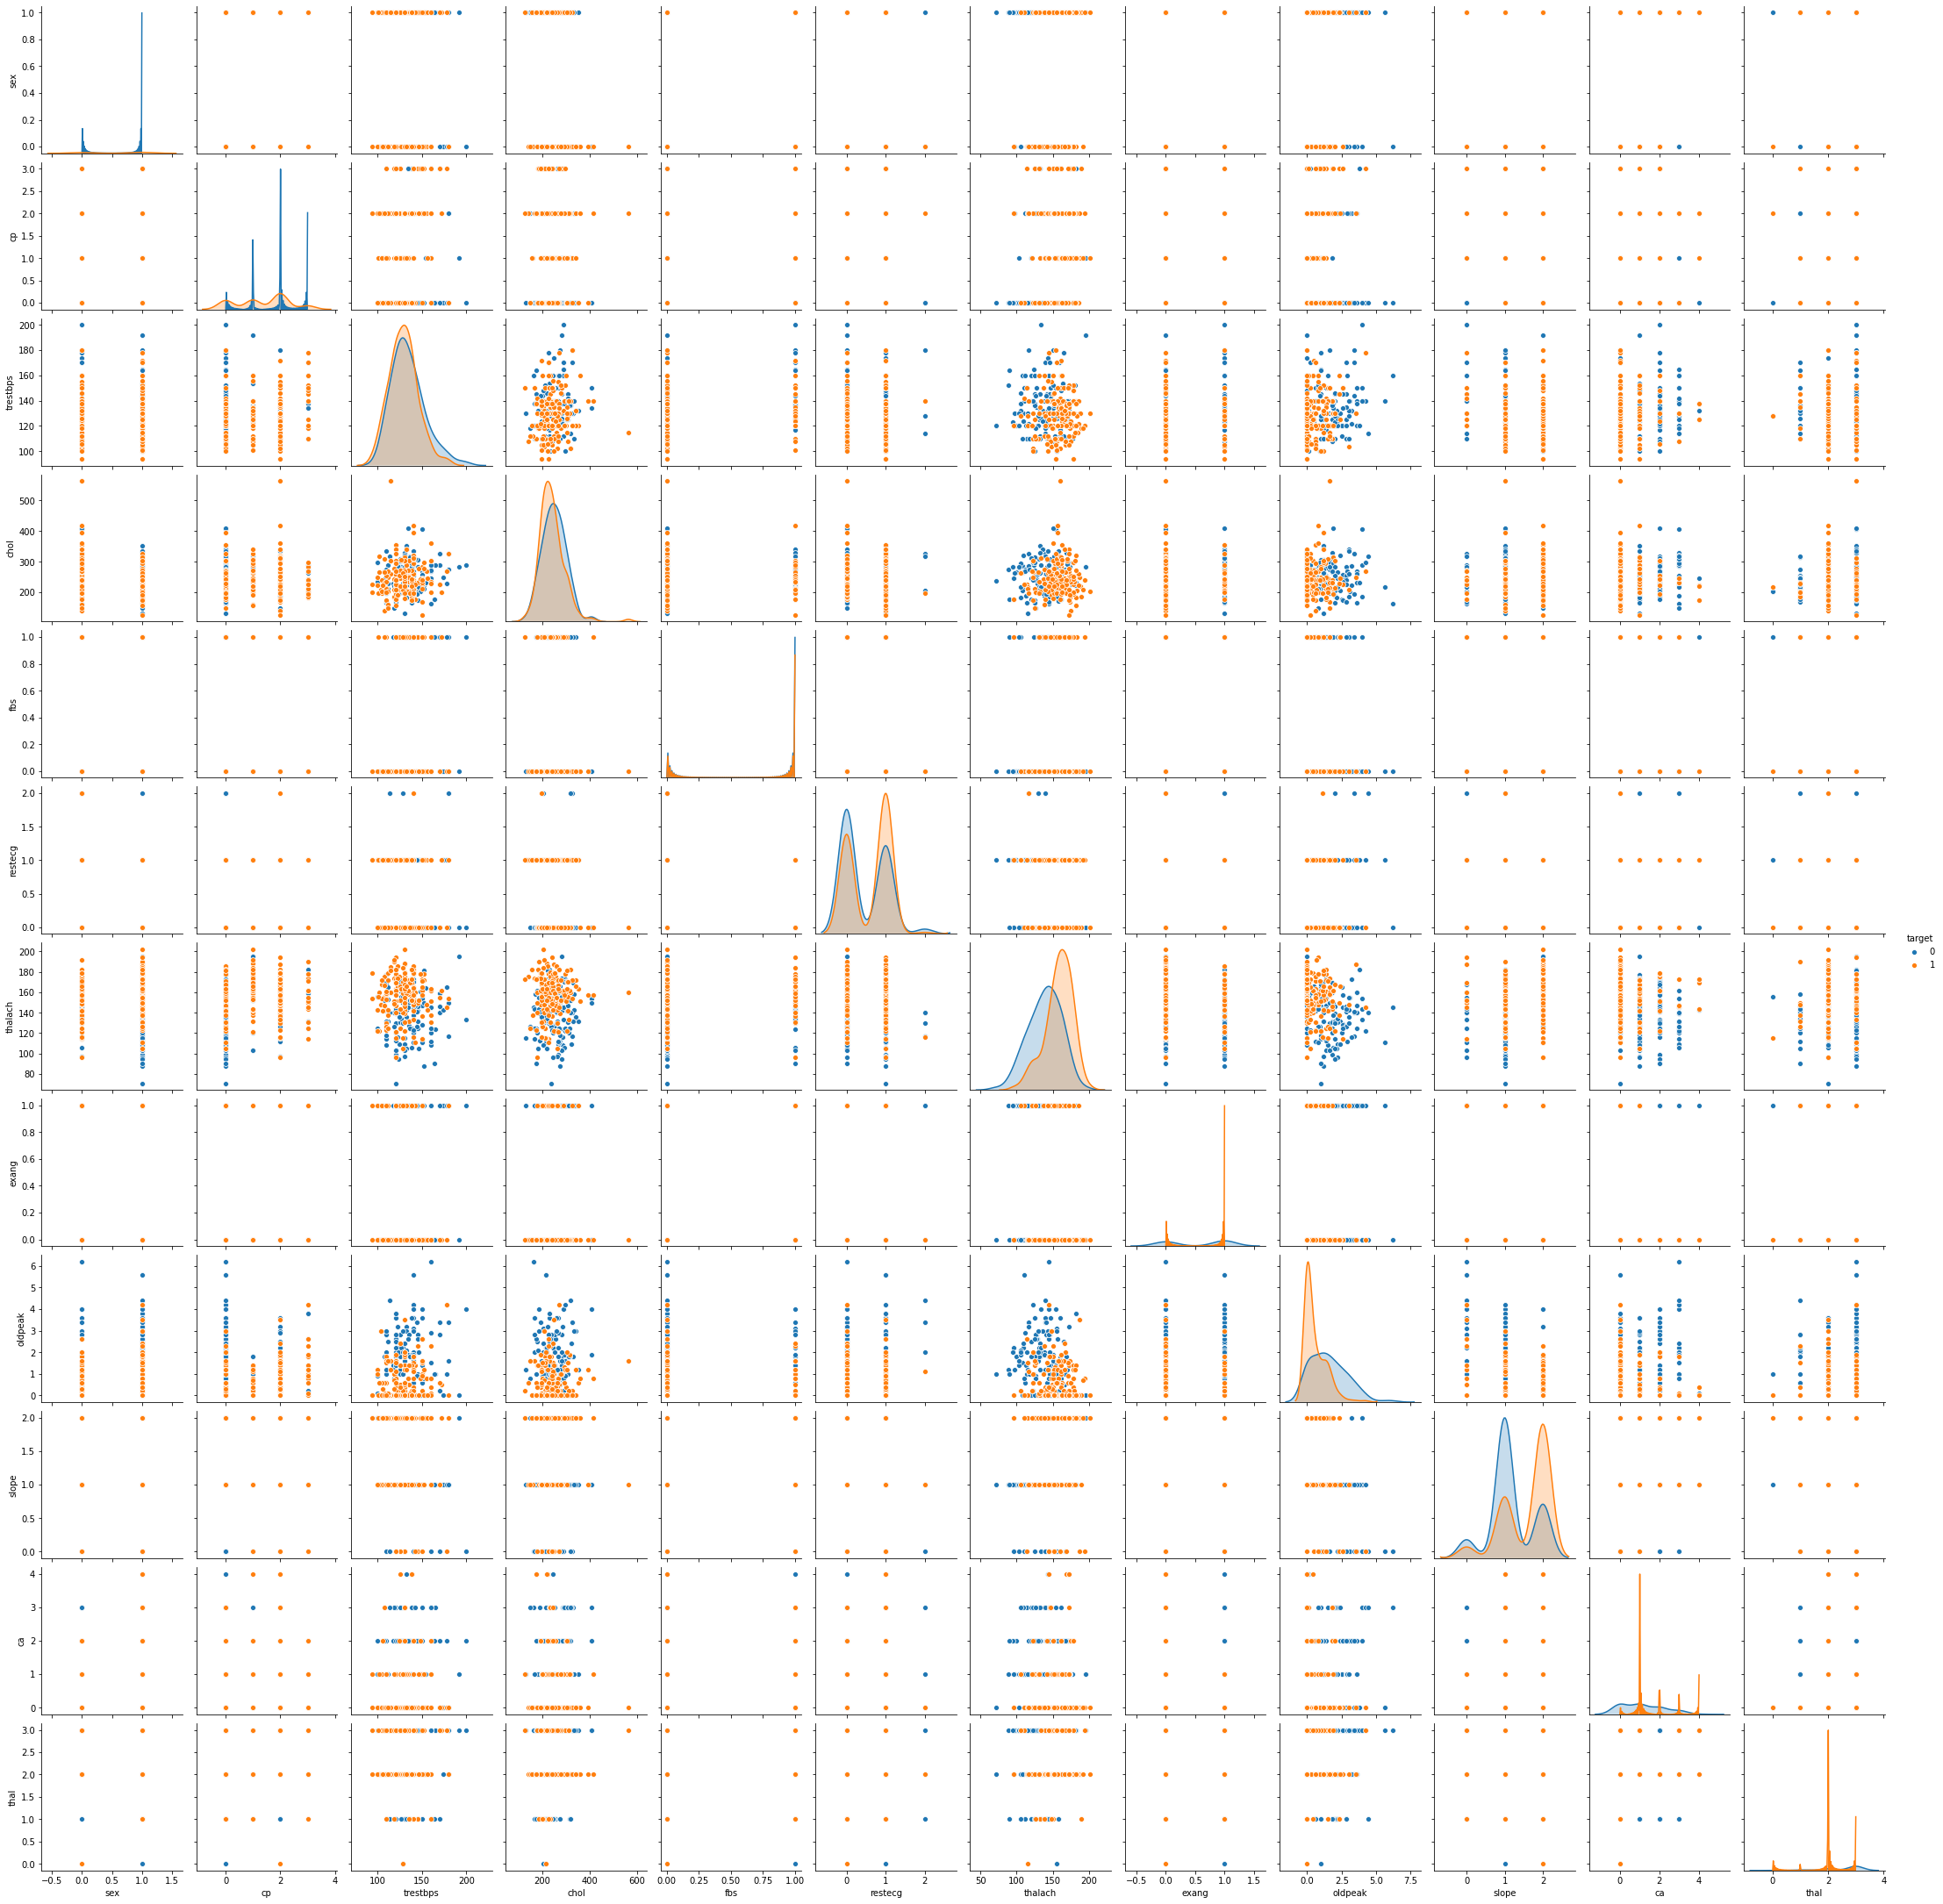

In [ ]:
#MORE DATA VISUALIZATION

sns.pairplot(dataset.drop(["age"],axis =1), hue = "target")

thal, fbs, and sex should be dropped because of the large imbalance between the two classes for each column.

In [ ]:
from sklearn.preprocessing import StandardScaler

#DEFINING TARGET AND PREDICTORS

X = dataset.drop(["target", "thal","fbs","sex"],axis=1 )
y = dataset["target"]

#SCALING DATA TO NORMAL DISTRIBUTION
scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

#SPLITTING DATA TO TRAIN, TEST, VALIDATION

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size = 0.2, random_state = 25, shuffle = True)
X_validation, X_test,y_validation, y_test = train_test_split(X_test,y_test, test_size = 0.5,random_state = 25, shuffle = True)

In [ ]:
#CROSS VALIDATION

mse_array = []
lambdas = np.logspace(-10,0.0000001,200)
x = np.random.randint(len(lambdas),size=len(lambdas))

d = 0
for i in lambdas:
    clf = RandomForestClassifier(n_estimators = 200, ccp_alpha = i,random_state=x[d],max_depth = x[d]+2)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_validation)
    
    mse = 0
    for j in range(len(pred)):
        mse+=(abs(pred[j]-y_validation[j]))**2
    mse_array.append([mse,i,x[d]])
    d+=1
alpha = min(mse_array)[1]
random_state = min(mse_array)[2]

In [ ]:
#FITTING MODEL TO RANDOM FOREST CLASSIFIER

clf = RandomForestClassifier(n_estimators = 200, ccp_alpha = alpha, random_state=random_state,max_depth = random_state + 2)
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

#GETTING ACCURACY FOR CLASSIFIER AND COMPARING IT TO BENCHMARKS
print(f"actual accuracy is {accuracy_score(y_test,pred)}  while benchmark with zeros is {accuracy_score(y_test,np.zeros((len(y_test),1)))} and benchmark with ones is {accuracy_score(y_test,np.ones((len(y_test),1)))}")

actual accuracy is 0.7096774193548387  while benchmark with zeros is 0.5806451612903226 and benchmark with ones is 0.41935483870967744


In [ ]:
#PLOTTING FEATURE IMPORTANCE PLOT

import plotly.express as px
importances = clf.feature_importances_
fig = px.bar(X, x=importances, y=X.columns, title = "Random Forest Feature Importance Plot",orientation ="h").update_yaxes(categoryorder = "total descending")
fig.show()

# **Comparison Between Gradient Boosted Trees and Random Forest**

In [ ]:
#CREATING GRADIENT BOOSTED TREES MODELS FOR EACH OF THE 2000 TREES SPECIFIED

import xgboost as xgb

mse_array_xgb = []

for i in range(2000):
  clf = xgb.XGBClassifier(n_estimators = i, max_depth = 4)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_test)

  mse = 0
  for j in range(len(pred)):
    mse+=(pred[j] - y_test[j])**2
  mse_array_xgb.append(mse/len(X_test))


In [ ]:
#CREATING RANDOM FOREST MODELS FOR EACH OF THE 500 TREES SPECIFIED

mse_array_rf = []

for i in range(500):
  clf = RandomForestClassifier(n_estimators = i+1, max_depth = 4)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_test)

  mse = 0
  for j in range(len(pred)):
    mse+=(pred[j] - y_test[j])**2
  mse_array_rf.append(mse/len(X_test))


Text(0.5, 0, 'Tree #')

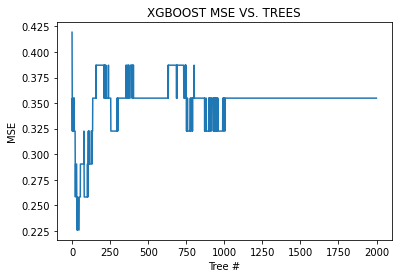

In [ ]:
#PLOTTING XGBOOST MSE VS. TREES
plt.plot(mse_array_xgb)
plt.title('XGBOOST MSE VS. TREES')
plt.ylabel('MSE')
plt.xlabel('Tree #')

Text(0.5, 0, 'Tree #')

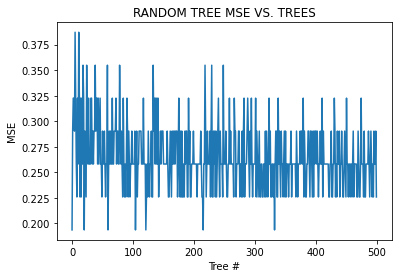

In [ ]:
#PLOTTING RANDOM TREE MSE VS. TREES
plt.plot(mse_array_rf)
plt.title('RANDOM TREE MSE VS. TREES')
plt.ylabel('MSE')
plt.xlabel('Tree #')